# Grover's Search Algorithm

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from qiskit import QuantumCircuit,QuantumRegister, ClassicalRegister, transpile, Aer, IBMQ
from qiskit import visualization 
from qiskit.tools import jupyter as qjupyter 

In [3]:
from qiskit import assemble

### Quantum Circuit for Grover Search Algorithm

In [4]:
to_bin= (lambda a,size=4 : np.array([int(i) for i in np.binary_repr(a,size)]))


In [5]:
to_bin(14)

array([1, 1, 1, 0])

In [6]:
# Element to find 
element = 15

In [7]:
n = 4
qr = QuantumRegister(n,name="q")
qr2 = QuantumRegister(1,"x")
cr = ClassicalRegister(n,"c")
grover_circuit = QuantumCircuit(qr,qr2,cr)
w = np.flip(to_bin(element)) #  1101[13(decimal)] element is mrked (lsb to msb)

In [8]:
w

array([1, 1, 1, 1])

our oracle function will be $U_w |x\rangle  |y\rangle = |y \oplus f(x) \rangle$


$f(x)= 1$ for $x = w$ and  $f(x)=0$ for $x\neq w$ 

In [9]:
def apply_oracle(n, w, circuit:QuantumCircuit):
    controled0 = np.array([i for i in  range(n) if not w[i]])
    if controled0.size>0:
        circuit.x(controled0)
    circuit.mct(list(range(n)), n)
    if controled0.size>0:
        circuit.x(controled0)
    circuit.barrier()
    circuit.draw()    

In [10]:
def reflect_uniform(circuit, n):
    circuit.h(list(range(n)))
    circuit.x(list(range(n)))
    circuit.mct(list(range(n)),n)
    circuit.x(list(range(n+1)))    
    circuit.h(list(range(n)))
    circuit.barrier()
    circuit.draw()  

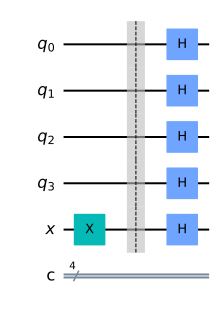

In [11]:
grover_circuit.x(n)
grover_circuit.barrier()
grover_circuit.h(list(range(n+1)))
# grover_circuit.barrier()
grover_circuit.draw()

In [12]:
state_vector_simulator = Aer.get_backend('statevector_simulator')
q_object = assemble(grover_circuit)
result = state_vector_simulator.run(q_object).result()
state_vector = result.data()['statevector']
state_vector = state_vector.data[:2**n]

In [13]:
init_state_vector = state_vector

#### Plotting state vector 

In [14]:
ket_a = np.zeros(2**n)
ket_a[element]=1
ket_e = (np.ones(2**n)-ket_a)/(2**n-1)**.5

In [15]:
ket_a

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [16]:
def get_projection(psi, e,a ):
    return (np.real(np.vdot(e,psi)), np.real(np.vdot(a,psi)))

In [17]:
def plot_vector(proj,axis = [0.0,1.0,0.0,1.0]):
    x_pos = y_pos = 0
    x_direct,y_direct = proj
    
    # Creating Plot 
    fig,ax=plt.subplots()
    ax.quiver(x_pos,y_pos,x_direct, y_direct, scale =1.0)
    ax.axis(axis)
    
    plt.show()

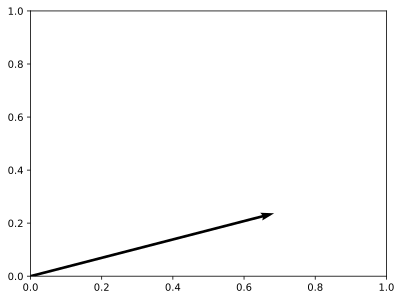

In [18]:
plot_vector(get_projection(state_vector,ket_e,ket_a))

In [19]:
get_projection(state_vector,ket_e,ket_a)

(0.6846531968814575, 0.1767766952966368)

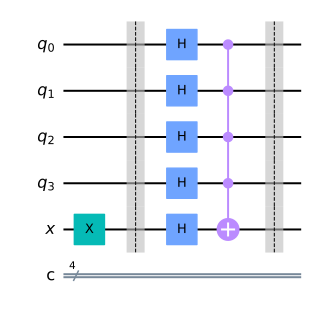

In [20]:
apply_oracle(n,w,grover_circuit)
grover_circuit.draw()

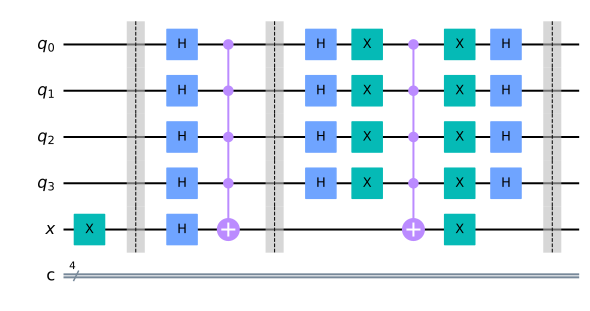

In [21]:
reflect_uniform(grover_circuit,n)
grover_circuit.draw()


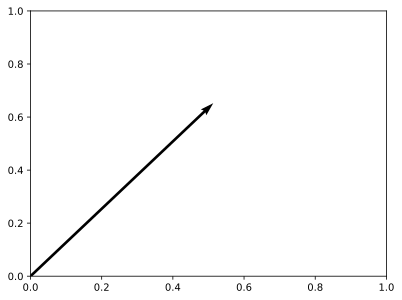

In [22]:
# Running Circuit
q_object = assemble(grover_circuit)
result = state_vector_simulator.run(q_object).result()
state_vector = result.data()['statevector']
state_vector = state_vector.data[:2**n]

# Plot state vector
plot_vector(get_projection(state_vector,ket_e,ket_a))

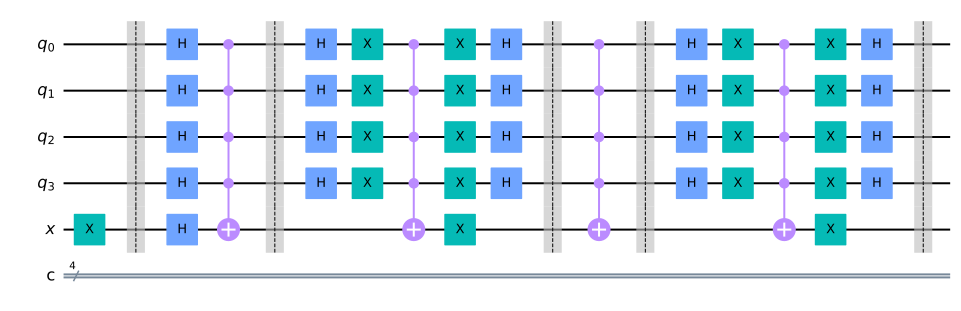

In [23]:
apply_oracle(n,w,grover_circuit)
reflect_uniform(grover_circuit,n)
grover_circuit.draw()

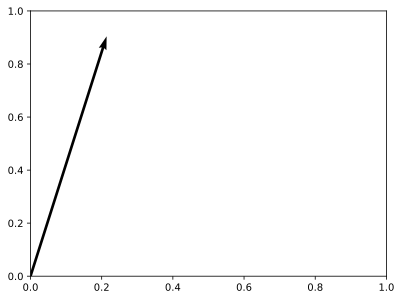

In [24]:
# Running Circuit
q_object = assemble(grover_circuit)
result = state_vector_simulator.run(q_object).result()
state_vector = result.data()['statevector']
state_vector = state_vector.data[:2**n]

# Plot state vector
plot_vector(get_projection(state_vector,ket_e,ket_a))

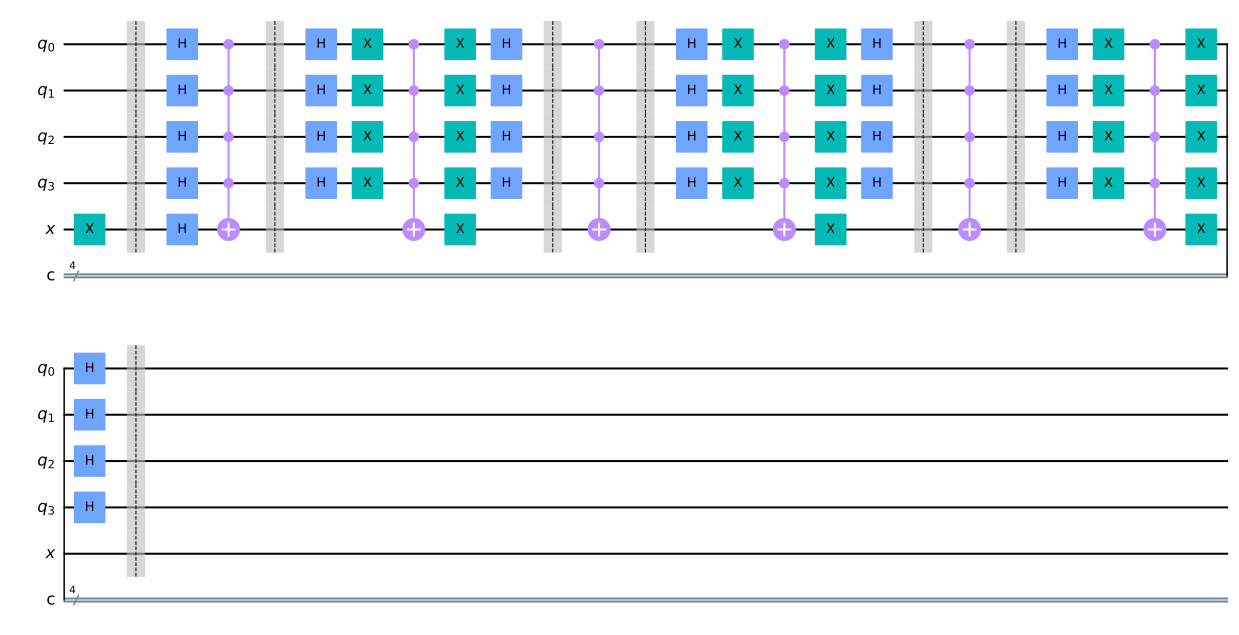

In [25]:
apply_oracle(n,w,grover_circuit)
reflect_uniform(grover_circuit,n)
grover_circuit.draw()

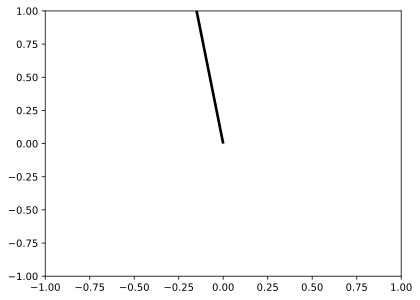

In [26]:
# Running Circuit
q_object = assemble(grover_circuit)
result = state_vector_simulator.run(q_object).result()
state_vector = result.data()['statevector']
state_vector = state_vector.data[:2**n]

# Plot state vector
plot_vector(get_projection(state_vector,ket_e,ket_a), axis=[-1.0,1.0,-1.0,1.0])

In [27]:
slope = get_projection( init_state_vector , ket_e, ket_a)
slope=slope[1]/slope[0]
theta0=np.arctan(slope)
theta0

0.2526802551420786

In [28]:
theta0*180/np.pi

14.477512185929921

In [29]:
# (2T+1)theta0 < pi/2
T = (np.pi/(2*theta0)-1)/2

In [30]:
T

2.608268839430409

## Create circuit for real computer 

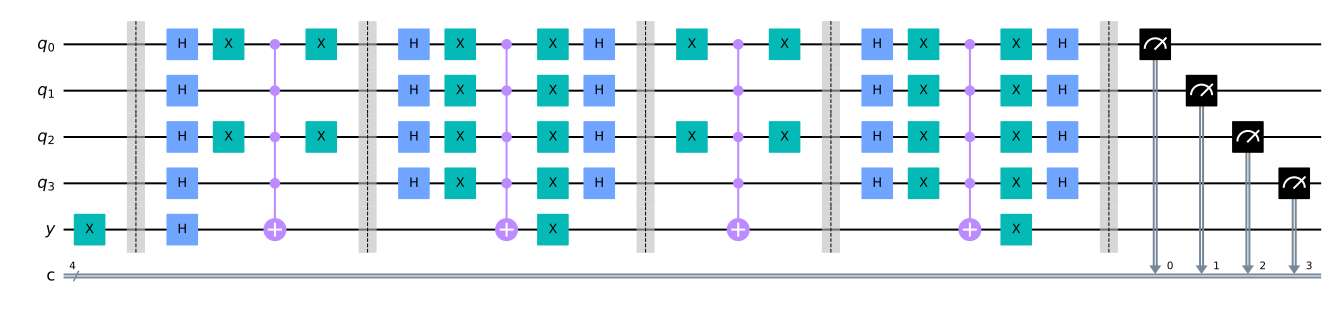

In [31]:
# Element to find 
n = 4           # numbr of qubit
# searching element 
element = 10    # 0 to 15

qr = QuantumRegister(n,name="q")
qr2 = QuantumRegister(1,"y")

cr = ClassicalRegister(n,"c")
grover_circuit = QuantumCircuit(qr,qr2,cr)

w = np.flip(to_bin(element)) 

grover_circuit.x(n)
grover_circuit.barrier()
grover_circuit.h(list(range(n+1)))


for i in range(int(np.floor(T))):
    apply_oracle(n, w, grover_circuit)
    reflect_uniform(grover_circuit, n)
    
for j in range(n):
    grover_circuit.measure(j,j)
     
grover_circuit.draw(fold=False)

In [32]:
qasm_simulator = Aer.get_backend("qasm_simulator")
q_object = assemble(grover_circuit) 
result = qasm_simulator.run(q_object).result()
result

Result(backend_name='qasm_simulator', backend_version='0.11.2', qobj_id='84a50014-7d77-4e23-85f8-b7f035f8a751', job_id='6236cd2e-d6a5-4f77-83be-3097a62f2be7', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0xc': 3, '0x5': 1, '0x9': 4, '0xa': 924, '0xd': 10, '0x6': 5, '0x8': 7, '0xb': 5, '0x3': 13, '0x7': 8, '0x1': 9, '0xf': 6, '0x2': 10, '0x0': 10, '0x4': 4, '0xe': 5}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1], ['c', 2], ['c', 3]], creg_sizes=[['c', 4]], global_phase=0.0, memory_slots=4, metadata={}, n_qubits=5, name='circuit-91', qreg_sizes=[['q', 4], ['y', 1]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['y', 0]]), status=DONE, seed_simulator=1216518965, metadata={'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': True, 'parallel_shots': 1, 'remapped_qubits': False, 'active_input_qubits': [0, 1, 2, 3, 4], 'num_clbits': 4, 'parallel_state_update': 4, 'sample_measu

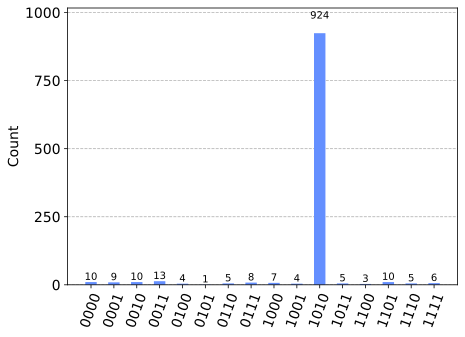

In [33]:
counts = result.get_counts(grover_circuit)
visualization.plot_histogram(counts)